In [1]:
import tensorflow as tf
from tensorflow import keras
# biblioteca para carregar arquivos (e.g. csv)
from google.colab import files
# biblioteca para manipulação de dados
import pandas as pd
# biblioteca para operações matemáticas
import numpy as np
# biblioteca para operações aleatórias
import random
# biblioteca para separação dos dados em treinamento e teste
from sklearn.model_selection import train_test_split

In [ ]:
### você pode usar o código abaixo para carregar qualquer conjunto de dados
### para testar, não esqueça de descomentar a linha abaixo (remover o #)
### para praticar, faça upload do conjunto de dados "iris.csv"
###    compartilhado pelo professor
files.upload()

In [ ]:
# carregando o conjunto de dados iris (https://pt.wikipedia.org/wiki/Conjunto_de_dados_flor_Iris)
dataset = pd.read_csv('biodiversity-br.csv')
#dataset = pd.read_csv('biodiversity-br.csv')
# visualizando parte dos dados
dataset

In [ ]:
# separando o rótulo Species (Aprendizado de Máquina Supervisionado) dos demais atributos: y
y = dataset['classe']
dataset = dataset.drop(['classe'], axis = 1)

In [ ]:
# dividindo o conjunto de dados em treinamento e teste
# test_size informa qual o percentual de dados que vamos usar no teste
# neste exemplo estamos usando 10% (0.1)
X_train,X_test,y_train,y_test = train_test_split(dataset, y, test_size=0.1)

In [ ]:
y_train = np.asarray(y_train).astype('float32')#.reshape((-1,1))
y_test  = np.asarray(y_test).astype('float32')#.reshape((-1,1))

In [ ]:
np.asarray(y_test).astype('float32')

array([1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       0., 0.], dtype=float32)

In [ ]:
X_train.iloc[0].shape

(8,)

In [ ]:
#model = keras.models.Sequential()
#model.add(keras.layers.Flatten(input_shape=[28, 28]))
#model.add(keras.layers.Dense(300, activation="relu"))
#model.add(keras.layers.Dense(100, activation="relu"))
#model.add(keras.layers.Dense(10, activation="softmax"))

# similar code
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[1, 8]),
  keras.layers.Dense(200, activation="relu"),
  keras.layers.Dense(100, activation="relu"),
  keras.layers.Dense(10, activation="sigmoid")
  ])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 8)                 0         
                                                                 
 dense_6 (Dense)             (None, 200)               1800      
                                                                 
 dense_7 (Dense)             (None, 100)               20100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 22,910
Trainable params: 22,910
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="binary_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=1, validation_data=(X_test, y_test))

ValueError: ignored

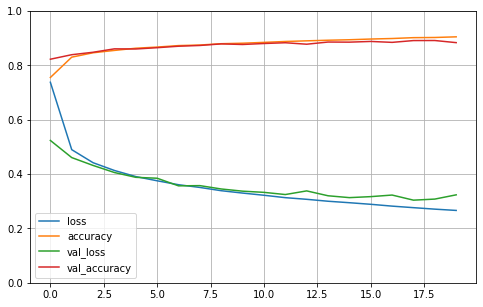

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 63.5790 - accuracy: 0.8429


[63.5789680480957, 0.8428999781608582]

In [ ]:
#predizendo um novo valor
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_pred = model.predict(X_new)

In [ ]:
y_pred

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_class=np.argmax(y_pred,axis=1)
np.array(class_names)[y_class]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [ ]:
y_new = y_test[:3]
np.array(class_names)[y_new]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')